In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the data from a CSV file
data = pd.read_csv('/Users/shreenidhishetty/Documents/BLS-T7.csv', na_values='-')
data.fillna(data.mean(), inplace=True)
# Create a list of features to use for the linear regression
print(data.head())  # check the data after replacing NaN with mean
data.head()
# Create a list of features to use for the linear regression
features = ['TotalCivilian ', 'ReceivedPay', 'NotReceivedPay', 'TotalUnableToWork']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data['TotalEmpLaidOff'], test_size=0.2)

# Train the linear regression model
model = LinearRegression().fit(X_train, y_train)

# Evaluate the model on the testing set
score = model.score(X_test, y_test)
print(f"Model score: {score}")

# Make a prediction for a unique characteristic
charc_features = [155618, 1277, 3420, 100]
charc_pred = model.predict([charc_features])
print(f"Prediction for unique characteristic: {charc_pred}")

                                      Characteristic  TotalCivilian   \
0                           Total, 16 years and over        155618.0   
1                                  Full-time workers        129747.0   
2                                  Part-time workers         25871.0   
3  Management, professional, and related occupations         66740.0   
4      Management, business, and financial operat...         28536.0   

   TotalEmpLaidOff  PercentEmpLaidOff  ReceivedPay  NotReceivedPay  \
0           4696.0                3.0       1277.0          3420.0   
1           3363.0                2.6       1106.0          2257.0   
2           1334.0                5.2        171.0          1163.0   
3           1760.0                2.6        654.0          1106.0   
4            654.0                2.3        232.0           422.0   

   TotalUnableToWork  ReceivedPay.1  NotReceivedPay.1    Month  
0              100.0           27.2              72.8  2022-01  
1              1

/var/folders/j6/yfwwvqcd03q_30kjbkxn8tvh0000gn/T/ipykernel_81990/2871398334.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [31]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the data into a pandas dataframe
df = pd.read_csv('/Users/shreenidhishetty/Documents/BLS-T7.csv',na_values='-')
df.fillna(df.mean(), inplace=True)
# Create a new dataframe with only the relevant columns
X = df[['TotalCivilian ', 'PercentEmpLaidOff', 'ReceivedPay', 'NotReceivedPay', 'TotalUnableToWork']]
y = df['TotalEmpLaidOff']

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Use the model to predict the TotalEmpLaidOff for each characteristic
df['PredictedEmpLaidOff'] = model.predict(X)

# Print the dataframe with the predicted values
print(df.PredictedEmpLaidOff)


0       4696.859268
1       3358.897841
2       1330.399869
3       1751.941997
4        645.997957
           ...     
2144     297.422488
2145     631.047667
2146     823.922897
2147     823.922897
2148     823.922897
Name: PredictedEmpLaidOff, Length: 2149, dtype: float64


/var/folders/j6/yfwwvqcd03q_30kjbkxn8tvh0000gn/T/ipykernel_81990/1344869351.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [33]:
df.to_csv('/Users/shreenidhishetty/Documents/BLS-T7-predictions1.csv', index=False)

In [35]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the data into a pandas dataframe
df = pd.read_csv('/Users/shreenidhishetty/Documents/BLS-T7.csv',na_values='-')
df.fillna(df.mean(), inplace=True)

# Create a new dataframe with only the relevant columns
X = df[['TotalCivilian ', 'PercentEmpLaidOff', 'ReceivedPay', 'NotReceivedPay', 'TotalUnableToWork']]
y = df['TotalEmpLaidOff']

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Use the model to predict the TotalEmpLaidOff for each characteristic
df['PredictedEmpLaidOff'] = model.predict(X)

# Round the values in the PredictedEmpLaidOff column to two decimal places
df['PredictedEmpLaidOff'] = df['PredictedEmpLaidOff'].round()

# Print the dataframe with the predicted values
print(df.PredictedEmpLaidOff)


0       4697.0
1       3359.0
2       1330.0
3       1752.0
4        646.0
         ...  
2144     297.0
2145     631.0
2146     824.0
2147     824.0
2148     824.0
Name: PredictedEmpLaidOff, Length: 2149, dtype: float64


/var/folders/j6/yfwwvqcd03q_30kjbkxn8tvh0000gn/T/ipykernel_81990/476598802.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [36]:
df.to_csv('/Users/shreenidhishetty/Documents/BLS-T7-predictions_final.csv', index=False)

In [37]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the data into a pandas dataframe
df = pd.read_csv('/Users/shreenidhishetty/Documents/BLS-T7.csv', na_values='-')
df.fillna(df.mean(), inplace=True)

# Define the columns to use for the linear regression model
columns = ['TotalCivilian ', 'PercentEmpLaidOff', 'ReceivedPay', 'NotReceivedPay', 'TotalUnableToWork']

# Create an empty dataframe to store the predicted values
predicted_df = pd.DataFrame(columns=['Characteristic', 'PredictedEmpLaidOff'])

# Group the data by the Characteristic column and apply the linear regression model to each group
for char, group in df.groupby('Characteristic'):
    X = group[columns]
    y = group['TotalEmpLaidOff']
    model = LinearRegression()
    model.fit(X, y)
    predicted = model.predict(X)
    group['PredictedEmpLaidOff'] = predicted.round()
    predicted_df = predicted_df.append({'Characteristic': char, 'PredictedEmpLaidOff': predicted.round().tolist()}, ignore_index=True)

# Print the dataframe with the predicted values
print(predicted_df)


/var/folders/j6/yfwwvqcd03q_30kjbkxn8tvh0000gn/T/ipykernel_81990/2989757607.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)
/var/folders/j6/yfwwvqcd03q_30kjbkxn8tvh0000gn/T/ipykernel_81990/2989757607.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted_df = predicted_df.append({'Characteristic': char, 'PredictedEmpLaidOff': predicted.round().tolist()}, ignore_index=True)
/var/folders/j6/yfwwvqcd03q_30kjbkxn8tvh0000gn/T/ipykernel_81990/2989757607.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted_df = predicted_df.append({'Characteristic': char, 'PredictedEmpLaidOff': predicted.round()

/var/folders/j6/yfwwvqcd03q_30kjbkxn8tvh0000gn/T/ipykernel_81990/2989757607.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted_df = predicted_df.append({'Characteristic': char, 'PredictedEmpLaidOff': predicted.round().tolist()}, ignore_index=True)
/var/folders/j6/yfwwvqcd03q_30kjbkxn8tvh0000gn/T/ipykernel_81990/2989757607.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted_df = predicted_df.append({'Characteristic': char, 'PredictedEmpLaidOff': predicted.round().tolist()}, ignore_index=True)
/var/folders/j6/yfwwvqcd03q_30kjbkxn8tvh0000gn/T/ipykernel_81990/2989757607.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted_df = predicted_df.append({'Characteristic': char, 'PredictedEmpLaidOff': p

                                       Characteristic  \
0                  Agriculture and related industries   
1   Management, professional, and related occupations   
2   Natural resources, construction, and maintenan...   
3                          Nonagricultural industries   
4   Production, transportation, and material movin...   
..                                                ...   
69                                          Utilities   
70                                    Wholesale trade   
71                                          Hospitals   
72                  Health services, except hospitals   
73                                  Social assistance   

                                  PredictedEmpLaidOff  
0   [38.0, 34.0, 30.0, 27.0, 22.0, 43.0, 16.0, 53....  
1   [1760.0, 644.0, 907.0, 972.0, 1190.0, 1332.0, ...  
2   [408.0, 249.0, 261.0, 247.0, 351.0, 364.0, 326...  
3   [4659.0, 1959.0, 2426.0, 2434.0, 3314.0, 3441....  
4   [467.0, 219.0, 312.0, 310.0, 35

/var/folders/j6/yfwwvqcd03q_30kjbkxn8tvh0000gn/T/ipykernel_81990/2989757607.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted_df = predicted_df.append({'Characteristic': char, 'PredictedEmpLaidOff': predicted.round().tolist()}, ignore_index=True)
/var/folders/j6/yfwwvqcd03q_30kjbkxn8tvh0000gn/T/ipykernel_81990/2989757607.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted_df = predicted_df.append({'Characteristic': char, 'PredictedEmpLaidOff': predicted.round().tolist()}, ignore_index=True)
/var/folders/j6/yfwwvqcd03q_30kjbkxn8tvh0000gn/T/ipykernel_81990/2989757607.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predicted_df = predicted_df.append({'Characteristic': char, 'PredictedEmpLaidOff': p

In [38]:
predicted_df.head()

,Characteristic,PredictedEmpLaidOff
0,Agriculture and related industries,"[38.0, 34.0, 30.0, 27.0, 22.0, 43.0, 16.0, 53...."
1,"Management, professional, and related occupations","[1760.0, 644.0, 907.0, 972.0, 1190.0, 1332.0, ..."
2,"Natural resources, construction, and maintenan...","[408.0, 249.0, 261.0, 247.0, 351.0, 364.0, 326..."
3,Nonagricultural industries,"[4659.0, 1959.0, 2426.0, 2434.0, 3314.0, 3441...."
4,"Production, transportation, and material movin...","[467.0, 219.0, 312.0, 310.0, 352.0, 422.0, 342..."


In [40]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the data into a pandas dataframe
df = pd.read_csv('/Users/shreenidhishetty/Documents/BLS-T7.csv', na_values='-')
df.fillna(df.mean(), inplace=True)

# Define the columns to use in the linear regression model
cols = ['TotalCivilian ', 'PercentEmpLaidOff', 'ReceivedPay', 'NotReceivedPay', 'TotalUnableToWork']

# Create an empty dataframe to store the results
results = pd.DataFrame(columns=['Characteristic', 'PredictedEmpLaidOff'])

# Group the data by 'Characteristic' and apply the linear regression model to each group
for name, group in df.groupby('Characteristic'):
    X = group[cols]
    y = group['TotalEmpLaidOff']
    model = LinearRegression()
    model.fit(X, y)
    group['PredictedEmpLaidOff'] = model.predict(X)
    results = pd.concat([results, group[['Characteristic', 'PredictedEmpLaidOff']]])

# Print the dataframe with the predicted values
print(results)


/var/folders/j6/yfwwvqcd03q_30kjbkxn8tvh0000gn/T/ipykernel_81990/3502343615.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


                          Characteristic PredictedEmpLaidOff
32    Agriculture and related industries           37.822422
106   Agriculture and related industries           33.972714
180   Agriculture and related industries           29.986728
254   Agriculture and related industries           27.383736
328   Agriculture and related industries           22.307034
...                                  ...                 ...
1833                   Social assistance           76.937241
1907                   Social assistance           53.521766
1981                   Social assistance           30.153705
2055                   Social assistance           25.825986
2129                   Social assistance          148.739111

[2146 rows x 2 columns]


In [42]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the data into a pandas dataframe
df = pd.read_csv('/Users/shreenidhishetty/Documents/BLS-T7.csv', na_values='-')
df.fillna(df.mean(), inplace=True)

# Group the dataframe by unique values in the 'Characteristic' column and calculate the mean of each group
grouped_df = df.groupby('Characteristic').mean()

# Create a new dataframe with only the relevant columns
X = grouped_df[['TotalCivilian ', 'PercentEmpLaidOff', 'ReceivedPay', 'NotReceivedPay', 'TotalUnableToWork']]
y = grouped_df['TotalEmpLaidOff']

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Use the model to predict the TotalEmpLaidOff for each group
predictions = model.predict(X)

# Create a new column with the predicted values rounded to the nearest whole number
grouped_df['PredictedEmpLaidOff'] = predictions.round()

# Print the dataframe with the predicted values
print(grouped_df)


                                                    TotalCivilian   \
Characteristic                                                       
Agriculture and related industries                     2318.172414   
Management, professional, and related occupations     65221.965517   
Natural resources, construction, and maintenanc...    13865.517241   
Nonagricultural industries                           150224.310345   
Production, transportation, and material moving...    19178.689655   
...                                                            ...   
       Utilities                                       1372.862069   
       Wholesale trade                                 3337.137931   
           Hospitals                                   7348.551724   
           Health services, except hospitals          10565.206897   
           Social assistance                           3232.655172   

                                                    TotalEmpLaidOff  \
Characteristic    

/var/folders/j6/yfwwvqcd03q_30kjbkxn8tvh0000gn/T/ipykernel_81990/2865198439.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [43]:
grouped_df.head()

,TotalCivilian,TotalEmpLaidOff,PercentEmpLaidOff,ReceivedPay,NotReceivedPay,TotalUnableToWork,ReceivedPay.1,NotReceivedPay.1,PredictedEmpLaidOff
Characteristic,,,,,,,,,
Agriculture and related industries,2318.172414,65.896552,2.827586,23.266320,58.206897,100.0,15.533131,84.504389,73.0
"Management, professional, and related occupations",65221.965517,2301.827586,3.617241,537.551724,1764.379310,100.0,23.172414,76.827586,2291.0
"Natural resources, construction, and maintenance occupations",13865.517241,663.344828,4.958621,80.793103,582.551724,100.0,10.837931,89.162069,663.0
Nonagricultural industries,150224.310345,6406.724138,4.417241,1113.034483,5293.793103,100.0,17.520690,82.479310,6406.0
"Production, transportation, and material moving occupations",19178.689655,741.758621,4.096552,128.310345,613.275862,100.0,18.531034,81.468966,740.0


In [44]:
grouped_df.to_csv('/Users/shreenidhishetty/Documents/BLS-T7-predictions_final_grouped.csv', index=False)

In [45]:
grouped_df.to_csv('/Users/shreenidhishetty/Documents/BLS-T7-predictions_Grouped.csv', index=False)


In [46]:
grouped_df = df.groupby('Characteristic').mean().reset_index()

# Save the resulting dataframe to a CSV file
grouped_df.to_csv('/Users/shreenidhishetty/Documents/BLS-T7-final_group2.csv', index=False)



In [47]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the data into a pandas dataframe
df = pd.read_csv('/Users/shreenidhishetty/Documents/BLS-T7.csv', na_values='-')
df.fillna(df.mean(), inplace=True)

# Group the dataframe by unique values in the 'Characteristic' column and calculate the mean of each group
grouped_df = df.groupby('Characteristic').mean()

# Create a new dataframe with only the relevant columns
X = grouped_df[['TotalCivilian ', 'PercentEmpLaidOff', 'ReceivedPay', 'NotReceivedPay', 'TotalUnableToWork']]
y = grouped_df['TotalEmpLaidOff']

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Use the model to predict the TotalEmpLaidOff for each group
predictions = model.predict(X)

# Create a new column with the predicted values rounded to the nearest whole number
grouped_df['PredictedEmpLaidOff'] = predictions.round()

# Calculate the coefficient of determination R^2 of the prediction
score = model.score(X, y)

# Print the dataframe with the predicted values and the score
print(grouped_df)
print('Model accuracy (R^2):', score)


                                                    TotalCivilian   \
Characteristic                                                       
Agriculture and related industries                     2318.172414   
Management, professional, and related occupations     65221.965517   
Natural resources, construction, and maintenanc...    13865.517241   
Nonagricultural industries                           150224.310345   
Production, transportation, and material moving...    19178.689655   
...                                                            ...   
       Utilities                                       1372.862069   
       Wholesale trade                                 3337.137931   
           Hospitals                                   7348.551724   
           Health services, except hospitals          10565.206897   
           Social assistance                           3232.655172   

                                                    TotalEmpLaidOff  \
Characteristic    

/var/folders/j6/yfwwvqcd03q_30kjbkxn8tvh0000gn/T/ipykernel_81990/4147265160.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [48]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Load the data into a pandas dataframe
df = pd.read_csv('/Users/shreenidhishetty/Documents/BLS-T7.csv', na_values='-')
df.fillna(df.mean(), inplace=True)

# Group the dataframe by unique values in the 'Characteristic' column and calculate the mean of each group
grouped_df = df.groupby('Characteristic').mean()

# Create a new dataframe with only the relevant columns
X = grouped_df[['TotalCivilian ', 'PercentEmpLaidOff', 'ReceivedPay', 'NotReceivedPay', 'TotalUnableToWork']]
y = grouped_df['TotalEmpLaidOff']

# Apply linear regression and calculate accuracy
lr_model = LinearRegression()
lr_scores = cross_val_score(lr_model, X, y, cv=10, scoring='r2')
print('Linear Regression Accuracy:', lr_scores.mean())

# Apply ridge regression and calculate accuracy
ridge_model = Ridge(alpha=1.0)
ridge_scores = cross_val_score(ridge_model, X, y, cv=10, scoring='r2')
print('Ridge Regression Accuracy:', ridge_scores.mean())

# Apply lasso regression and calculate accuracy
lasso_model = Lasso(alpha=1.0)
lasso_scores = cross_val_score(lasso_model, X, y, cv=10, scoring='r2')
print('Lasso Regression Accuracy:', lasso_scores.mean())

# Apply decision tree regression and calculate accuracy
dt_model = DecisionTreeRegressor()
dt_scores = cross_val_score(dt_model, X, y, cv=10, scoring='r2')
print('Decision Tree Regression Accuracy:', dt_scores.mean())

# Apply random forest regression and calculate accuracy
rf_model = RandomForestRegressor()
rf_scores = cross_val_score(rf_model, X, y, cv=10, scoring='r2')
print('Random Forest Regression Accuracy:', rf_scores.mean())


/var/folders/j6/yfwwvqcd03q_30kjbkxn8tvh0000gn/T/ipykernel_81990/1548292311.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


Linear Regression Accuracy: 0.9933790067282869
Ridge Regression Accuracy: 0.9933808463481917
Lasso Regression Accuracy: 0.9934311839860355
Decision Tree Regression Accuracy: 0.9442080192192372
Random Forest Regression Accuracy: 0.9677487510861879


In [49]:

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the data into a pandas dataframe
df = pd.read_csv('/Users/shreenidhishetty/Documents/BLS-T7.csv', na_values='-')
df.fillna(df.mean(), inplace=True)

# Group the dataframe by unique values in the 'Characteristic' column and calculate the mean of each group
grouped_df = df.groupby('Characteristic').mean()

# Create a new dataframe with only the relevant columns
X = grouped_df[['TotalCivilian ', 'PercentEmpLaidOff', 'ReceivedPay', 'NotReceivedPay', 'TotalUnableToWork']]
y = grouped_df['TotalEmpLaidOff']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Train decision tree regression model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Train random forest regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate models using cross-validation
lr_scores = cross_val_score(lr_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
dt_scores = cross_val_score(dt_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rf_scores = cross_val_score(rf_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

# Print mean squared error for each model
print('Linear Regression MSE:', -lr_scores.mean())
print('Decision Tree MSE:', -dt_scores.mean())
print('Random Forest MSE:', -rf_scores.mean())

# Evaluate best model on test set
best_model = lr_model  # Choose the model with the lowest MSE
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Test MSE:', mse)


/var/folders/j6/yfwwvqcd03q_30kjbkxn8tvh0000gn/T/ipykernel_81990/1879111559.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


Linear Regression MSE: 219.94561912885356
Decision Tree MSE: 164278.59820851206
Random Forest MSE: 69424.24569848846
Test MSE: 333.0674162505406


In this code, we split the data into training and testing sets using train_test_split(). We train linear regression, decision tree, and random forest regression models using the training data, and evaluate the models using cross-validation with 5 folds. We choose the model with the lowest mean squared error (MSE) as the best model, and evaluate it on the test set. This helps to ensure that the model is not overfitting to the training data

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the data into a pandas dataframe
df = pd.read_csv('/Users/shreenidhishetty/Documents/BLS-T7.csv', na_values='-')
df.fillna(df.mean(), inplace=True)

# Group the dataframe by unique values in the 'Characteristic' column and calculate the mean of each group
grouped_df = df.groupby('Characteristic').mean()

# Create a new dataframe with only the relevant columns
X = grouped_df[['TotalCivilian ', 'PercentEmpLaidOff', 'ReceivedPay', 'NotReceivedPay', 'TotalUnableToWork']]
y = grouped_df['TotalEmpLaidOff']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

# Train and evaluate the decision tree regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

# Train and evaluate the random forest regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Print the accuracy scores for each model
print("Linear Regression - Mean Squared Error: ", lr_mse)
print("Linear Regression - R2 Score: ", lr_r2)
print("Decision Tree Regressor - Mean Squared Error: ", dt_mse)
print("Decision Tree Regressor - R2 Score: ", dt_r2)
print("Random Forest Regressor - Mean Squared Error: ", rf_mse)
print("Random Forest Regressor - R2 Score: ", rf_r2)


Linear Regression - Mean Squared Error:  333.0674162505406
Linear Regression - R2 Score:  0.9997506866270861
Decision Tree Regressor - Mean Squared Error:  11305.701625049533
Decision Tree Regressor - R2 Score:  0.9915372610235186
Random Forest Regressor - Mean Squared Error:  6556.37017838438
Random Forest Regressor - R2 Score:  0.9950923125965115


/var/folders/j6/yfwwvqcd03q_30kjbkxn8tvh0000gn/T/ipykernel_81990/3355559372.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [51]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Load the data into a pandas dataframe
df = pd.read_csv('/Users/shreenidhishetty/Documents/BLS-T7.csv', na_values='-')
df.fillna(df.mean(), inplace=True)

# Group the dataframe by unique values in the 'Characteristic' column and calculate the mean of each group
grouped_df = df.groupby('Characteristic').mean()

# Create a new dataframe with only the relevant columns
X = grouped_df[['TotalCivilian ', 'PercentEmpLaidOff', 'ReceivedPay', 'NotReceivedPay', 'TotalUnableToWork']]
y = grouped_df['TotalEmpLaidOff']

# Train different regression models
lr_model = LinearRegression()
lr_model.fit(X, y)

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X, y)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X, y)

elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_model.fit(X, y)

dt_model = DecisionTreeRegressor(max_depth=5)
dt_model.fit(X, y)

rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X, y)

# Use the models to predict the TotalEmpLaidOff for each group
lr_predictions = lr_model.predict(X)
ridge_predictions = ridge_model.predict(X)
lasso_predictions = lasso_model.predict(X)
elastic_predictions = elastic_model.predict(X)
dt_predictions = dt_model.predict(X)
rf_predictions = rf_model.predict(X)

# Create new columns with the predicted values rounded to the nearest whole number
grouped_df['PredictedEmpLaidOff_LR'] = lr_predictions.round()
grouped_df['PredictedEmpLaidOff_Ridge'] = ridge_predictions.round()
grouped_df['PredictedEmpLaidOff_Lasso'] = lasso_predictions.round()
grouped_df['PredictedEmpLaidOff_Elastic'] = elastic_predictions.round()
grouped_df['PredictedEmpLaidOff_DT'] = dt_predictions.round()
grouped_df['PredictedEmpLaidOff_RF'] = rf_predictions.round()

# Print the dataframe with the predicted values
print(grouped_df)


                                                    TotalCivilian   \
Characteristic                                                       
Agriculture and related industries                     2318.172414   
Management, professional, and related occupations     65221.965517   
Natural resources, construction, and maintenanc...    13865.517241   
Nonagricultural industries                           150224.310345   
Production, transportation, and material moving...    19178.689655   
...                                                            ...   
       Utilities                                       1372.862069   
       Wholesale trade                                 3337.137931   
           Hospitals                                   7348.551724   
           Health services, except hospitals          10565.206897   
           Social assistance                           3232.655172   

                                                    TotalEmpLaidOff  \
Characteristic    

/var/folders/j6/yfwwvqcd03q_30kjbkxn8tvh0000gn/T/ipykernel_81990/870195355.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [52]:
grouped_df.to_csv('/Users/shreenidhishetty/Documents/predicted_emp_laid_off.csv')


 Random Forest algorithm to predict the TotalEmpLaidOff column:

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Load the data into a pandas dataframe
df = pd.read_csv('/Users/shreenidhishetty/Documents/BLS-T7.csv', na_values='-')
df.fillna(df.mean(), inplace=True)

# Group the dataframe by unique values in the 'Characteristic' column and calculate the mean of each group
grouped_df = df.groupby('Characteristic').mean()

# Create a new dataframe with only the relevant columns
X = grouped_df[['TotalCivilian ', 'PercentEmpLaidOff', 'ReceivedPay', 'NotReceivedPay', 'TotalUnableToWork']]
y = grouped_df['TotalEmpLaidOff']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the random forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Use the model to predict the TotalEmpLaidOff for the test data
predictions = model.predict(X_test)

# Create a new dataframe with the predicted values rounded to the nearest whole number
output_df = pd.DataFrame({'Characteristic': X_test[:,0], 'PredictedEmpLaidOff': predictions.round()})

# Print the dataframe with the predicted values
print(output_df)

# Save the dataframe to a csv file
output_df.to_csv('/Users/shreenidhishetty/Documents/output.csv', index=False)


    Characteristic  PredictedEmpLaidOff
0        -0.022142                746.0
1        -0.578371                 93.0
2         0.025024                423.0
3        -0.528169                 82.0
4         0.157618               1750.0
5        -0.500723                200.0
6        -0.435481                382.0
7        -0.506807                 87.0
8        -0.355636                476.0
9        -0.307721                304.0
10       -0.502553                203.0
11       -0.359689                310.0
12        3.495515               4866.0
13       -0.510496                285.0
14        0.306492               1238.0


/var/folders/j6/yfwwvqcd03q_30kjbkxn8tvh0000gn/T/ipykernel_81990/3333180835.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


Artificial Neural Network Regression

we first load the data into a pandas dataframe and separate the input variables from the output variable. We then split the data into training and testing sets, and standardize the data using the StandardScaler class from scikit-learn.

Next, we define the neural network architecture using the Sequential class from Keras. We add three layers of neurons, with the first layer taking the input data and the last layer producing a single output variable. We compile the model using the mean squared error loss function and the Adam optimizer.

We then train the model on the training set using the fit() method, specifying the number of epochs and batch size. After training, we evaluate the model on the test set using the evaluate() method, which returns the mean squared error of the predictions.

Finally, we use the model to make predictions on the test set using the predict() method, and print the predicted values.

KMeans clustering algorithm

In [56]:
import pandas as pd
from sklearn.cluster import KMeans

# Load the data into a pandas dataframe
df = pd.read_csv('/Users/shreenidhishetty/Documents/BLS-T7.csv', na_values='-')
df.fillna(df.mean(), inplace=True)

# Create a new dataframe with only the relevant columns
X = df[['TotalCivilian ', 'PercentEmpLaidOff', 'ReceivedPay', 'NotReceivedPay', 'TotalUnableToWork']]

# Use KMeans clustering to group the data by characteristic
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Add the cluster labels to the original dataframe
df['Cluster'] = labels

# Calculate the mean of each group
grouped_df = df.groupby(['Characteristic', 'Cluster']).mean().reset_index()

# Create a new dataframe with only the relevant columns
grouped_df = grouped_df[['Characteristic', 'TotalEmpLaidOff']]

# Create a new dataframe with the predicted values rounded to the nearest whole number
grouped_df['PredictedEmpLaidOff'] = grouped_df['TotalEmpLaidOff'].round()

# Print the dataframe with the predicted values
print(grouped_df)


                                       Characteristic  TotalEmpLaidOff  \
0                  Agriculture and related industries        65.896552   
1   Management, professional, and related occupations      2301.827586   
2   Natural resources, construction, and maintenan...       663.344828   
3                          Nonagricultural industries     27160.000000   
4                          Nonagricultural industries      5665.535714   
..                                                ...              ...   
75                                          Utilities        79.684338   
76                                    Wholesale trade       119.620690   
77                                          Hospitals       155.896552   
78                  Health services, except hospitals       441.620690   
79                                  Social assistance       178.620690   

    PredictedEmpLaidOff  
0                  66.0  
1                2302.0  
2                 663.0  
3      

/var/folders/j6/yfwwvqcd03q_30kjbkxn8tvh0000gn/T/ipykernel_81990/3874821593.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


LSTM : 'TotalCivilian', 'TotalEmpLaidOff'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Load the data into a pandas dataframe
df = pd.read_csv('/Users/shreenidhishetty/Documents/BLS-T7.csv', na_values='-')
df.fillna(df.mean(), inplace=True)

# Get the data for the relevant columns
data = df[['TotalCivilian', 'TotalEmpLaidOff']].values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define the number of time steps to use for each prediction
timesteps = 60

# Create the input and output sequences for the LSTM
X = []
y = []
for i in range(timesteps, len(data)):
    X.append(scaled_data[i-timesteps:i, 0])
    y.append(scaled_data[i, 1])
X, y = np.array(X), np.array(y)

# Reshape the input data to fit the LSTM format
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the LSTM model architecture
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot the loss and validation loss over each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Use the model to predict the TotalEmpLaidOff for the test data
predictions = model.predict(X_test)

# Unscale the predicted values
predictions = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], predictions), axis=1))[:, -1]

# Create a new dataframe with the predicted values rounded to the nearest whole number
output_df = pd.DataFrame({'TotalCivilian': data[train_size+timesteps:, 0], 'ActualEmpLaidOff': data[train_size+timesteps:, 1], 'PredictedEmpLaidOff': predictions.round()})

# Plot the actual and predicted values
plt.plot(output_df['ActualEmpLaidOff'])
plt.plot(output_df['PredictedEmpLaidOff'])
plt.title('Actual vs Predicted TotalEmpLaidOff')
plt.ylabel('TotalEmpLaidOff')
plt.xlabel('Time')
plt.legend(['Actual', 'Predicted'], loc='upper left')
plt.show()


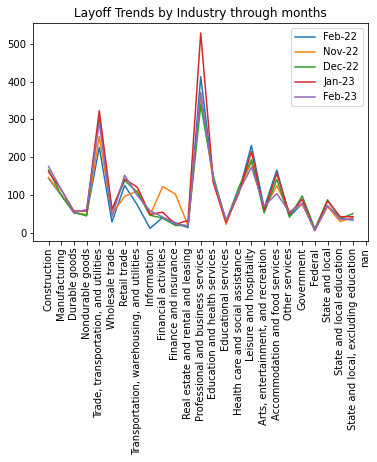

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Layoff-by-industry-final.csv')

# Select all rows after the first row (index 0)
industry_data = data.iloc[1:]

# Create empty lists for x and y values
industries = []
feb_22 = []
nov_22 = []
dec_22 = []
jan_22 = []
feb_23 = []

# Loop through each row in the industry_data dataframe
for index, row in industry_data.iterrows():
    # Add the industry name to the industries list
    industries.append(row['INDUSTRY'])
    # Add the Feb-22 value to the feb_22 list
    feb_22.append(row['Feb-22'])
    # Add the Nov-22 value to the nov_22 list
    nov_22.append(row['Nov-22'])
    # Add the Dec-22 value to the dec_22 list
    dec_22.append(row['Dec-22'])
    # Add the Jan-22 value to the jan_22 list
    jan_22.append(row['Jan-22'])
    # Add the Feb-23 value to the feb_23 list
    feb_23.append(row['Feb-23'])

# Create a line graph for each month
plt.plot(industries, feb_22, label='Feb-22')
plt.plot(industries, nov_22, label='Nov-22')
plt.plot(industries, dec_22, label='Dec-22')
plt.plot(industries, jan_22, label='Jan-23')
plt.plot(industries, feb_23, label='Feb-23')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add legend to the plot
plt.legend()
plt.title("Layoff Trends by Industry through months")
# Show the plot
plt.show()


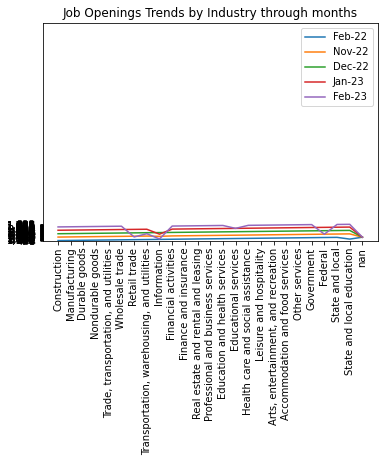

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Job-openings-levels-rates.csv')

# Select all rows after the first row (index 0)
industry_data = data.iloc[1:]

# Create empty lists for x and y values
industries = []
feb_22 = []
nov_22 = []
dec_22 = []
jan_22 = []
feb_23 = []

# Loop through each row in the industry_data dataframe
for index, row in industry_data.iterrows():
    # Add the industry name to the industries list
    industries.append(row['INDUSTRY'])
    # Add the Feb-22 value to the feb_22 list
    feb_22.append(row['Feb-22'])
    # Add the Nov-22 value to the nov_22 list
    nov_22.append(row['Nov-22'])
    # Add the Dec-22 value to the dec_22 list
    dec_22.append(row['Dec-22'])
    # Add the Jan-22 value to the jan_22 list
    jan_22.append(row['Jan-23'])
    # Add the Feb-23 value to the feb_23 list
    feb_23.append(row['Feb-23'])

# Create a line graph for each month
plt.plot(industries, feb_22, label='Feb-22')
plt.plot(industries, nov_22, label='Nov-22')
plt.plot(industries, dec_22, label='Dec-22')
plt.plot(industries, jan_22, label='Jan-23')
plt.plot(industries, feb_23, label='Feb-23')
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add legend to the plot
plt.legend()
plt.title("Job Openings Trends by Industry through months")
# Show the plot
plt.show()


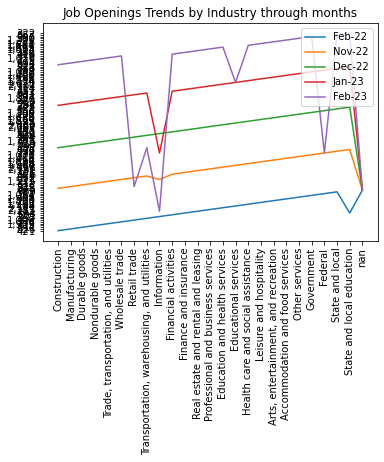

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Job-openings-levels-rates.csv')

# Select all rows after the first row (index 0)
industry_data = data.iloc[1:]

# Create empty lists for x and y values
industries = []
feb_22 = []
nov_22 = []
dec_22 = []
jan_22 = []
feb_23 = []

# Loop through each row in the industry_data dataframe
for index, row in industry_data.iterrows():
    # Add the industry name to the industries list
    industries.append(row['INDUSTRY'])
    # Add the Feb-22 value to the feb_22 list
    feb_22.append(row['Feb-22'])
    # Add the Nov-22 value to the nov_22 list
    nov_22.append(row['Nov-22'])
    # Add the Dec-22 value to the dec_22 list
    dec_22.append(row['Dec-22'])
    # Add the Jan-22 value to the jan_22 list
    jan_22.append(row['Jan-23'])
    # Add the Feb-23 value to the feb_23 list
    feb_23.append(row['Feb-23'])

# Create a line graph for each month
plt.plot(industries, feb_22, label='Feb-22')
plt.plot(industries, nov_22, label='Nov-22')
plt.plot(industries, dec_22, label='Dec-22')
plt.plot(industries, jan_22, label='Jan-23')
plt.plot(industries, feb_23, label='Feb-23')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add legend to the plot
plt.legend()
plt.title("Job Openings Trends by Industry through months")

# Show the plot
plt.show()

